In [4]:
!git clone https://github.com/tarotez/pyml

Cloning into 'pyml'...
remote: Enumerating objects: 314, done.
remote: Total 314 (delta 0), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (314/314), 16.76 MiB | 29.18 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [5]:
cd pyml

/content/pyml


Text(0, 0.5, 'Temperature')

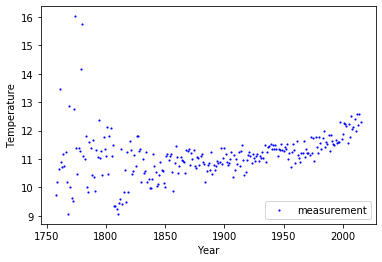

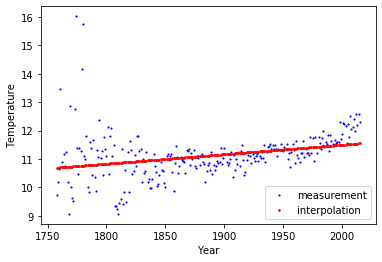

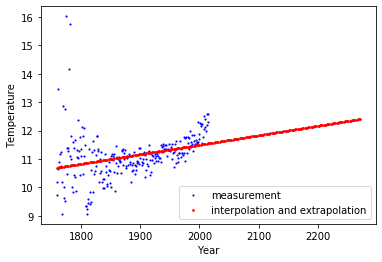

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
d = pd.read_csv('GlobalTemperatures.csv')
offset = 100
date = d['dt'][offset::12]
year = np.array([int(e.split('-')[0]) for e in date])
temperature = d['LandAverageTemperature'][offset::12]
lr = linear_model.LinearRegression()
lr.fit(year.reshape((-1,1)), temperature.values)
year_test = np.linspace(year.min(), year.max(), len(year))
temperature_predict = lr.predict(year_test.reshape((-1,1)))

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_test, temperature_predict, c='red', marker='.', s=10, label='interpolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

fig, ax = plt.subplots()
year_with_future_test = np.linspace(year.min(), year.max() + (year.max() - year.min()), len(year))
temperature_with_future_predict = lr.predict(year_with_future_test.reshape((-1,1)))
ax.scatter(year, temperature, label='measurement', c='b', marker='.', s=5)
ax.scatter(year_with_future_test, temperature_with_future_predict, c='red', marker='.', s=10, label='interpolation and extrapolation')
ax.legend(loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')

In [0]:
import numpy as np

def linear_nn(x, w):
  # return sigmoid(np.matmul(x,w))
  return np.matmul(x,w)

In [34]:
weight = np.array((lr.coef_[0], lr.intercept_))
error_list = []
for x, y in zip(year, temperature):
  error_list.append(linear_nn(np.array((x,1)), weight) - y)

np.array([error ** 2 for error in error_list]).mean() ** (1/2)

0.7868232851513102